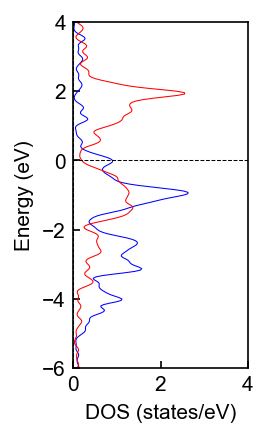

In [2]:
import os
import sys
import subprocess
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
#------------------------------------------------------------------------

### Read dos.xy file
def read_dos(file_path, x_column, y_column):
    x_value = []
    y_value = []
    with open(file_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            if len(data) != 0 and data[0] != '#':
                if len(data) >= max(x_column, y_column):
                    x_value.append(float(data[x_column - 1]))
                    y_value.append(float(data[y_column - 1]))
    return x_value, y_value
#------------------------------------------------------------------------

### MAIN PROGRAM
if __name__ == '__main__':
    
    ### SETTING #########################################################
    # set (x,y) axes
    fig = plt.figure(dpi=150,figsize=(1.5,3))
    xlabel_plot="DOS (states/eV)"
    ylabel_plot="Energy (eV)"

    # set min and max in energy and dos
    xmin_plot= 0.0; xmax_plot= 4.001; xstp_plot = 2.0
    ymin_plot=-6.0; ymax_plot= 4.001; ystp_plot = 2.0
    
    # set column in dos.xy
    xcol_data=[]; ycol_data=[]; color_data=[]; style_data=[]
    file_data = './dos.xy'
    #up-spin
    xcol_data.append(2)                      #dos
    ycol_data.append(1)                      #eng
    color_data.append('blue')                #'black' ...
    style_data.append('-')                   #solid line="-"
    #down-spin
    xcol_data.append(3)                      #dos
    ycol_data.append(1)                      #eng
    color_data.append('red')                 #'black' ...
    style_data.append('-')                   #solid line="-"
    
    ### READ DATA #########################################################
    # read dos.xy
    x_plot=[]; y_plot=[]
    for i in range(len(xcol_data)):
        x_data, y_data = read_dos(file_data, xcol_data[i], ycol_data[i])
        x_plot.append(x_data); y_plot.append(y_data)
    #print('xmin=',np.min(x_plot),'  xmax=',np.max(x_plot))
    #print('ymin=',np.min(y_plot),'  ymax=',np.max(y_plot))
    
    ### FIGURE #########################################################\    
    # plot band
    for i in range(len(x_plot)):
        x=x_plot[i][0:]
        y=y_plot[i][0:]
        plt.plot(x, y, color=color_data[i], linestyle=style_data[i], linewidth=0.5)
    
    # set axis limit
    plt.xlim(xmin_plot, xmax_plot)
    plt.ylim(ymin_plot, ymax_plot)

    # set x-axis
    plt.xticks(np.arange(xmin_plot, xmax_plot, xstp_plot),fontsize=10)
    plt.xlabel(xlabel_plot, fontsize=10)

    # set y-axis
    plt.yticks(np.arange(ymin_plot, ymax_plot, ystp_plot),fontsize=10)
    plt.ylabel(ylabel_plot, fontsize=10)

    # set zero
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5) 
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5) 
   
    # save/draw figure
    plt.savefig('fig_dos.png',format='png',bbox_inches='tight',transparent=True)
    plt.show()
    plt.clf()
    plt.close()